In [1]:
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('banking_updated.csv')
df.head()

age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4          93.444          -36.1      4.963       5228.1  0  
1         -0.1          93.200          -42.0      4.021       5195.8  0  
2         -1.7          94.055          -39.8      0.729       4991.6  1  
3         -1.8          93.075          -47.1      1.405       5099.1  0  
4         -2.9          92.201          -31.4      0.869       5076.2  1  

[5 rows x 21 columns]

In [3]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr_employed             y  
count  41188.000000  41188.000000  
mean    5167.035911      0.112654  
std       72.251528      0.316173  
min     4963.600000      0.000000  
25%     5099.100000      0.000000  
50%     5191.000000      0.000000  
75%     5228.100000      0.000000  
max     5228.100000      1.000000

In [4]:
df.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [5]:
df.head()

age          job  marital          education housing loan  campaign  \
0   44  blue-collar  married           basic.4y     yes   no         1   
1   53   technician  married            unknown      no   no         1   
2   28   management   single  university.degree     yes   no         3   
3   39     services  married        high.school      no   no         2   
4   55      retired  married           basic.4y     yes   no         1   

   previous     poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  \
0         0  nonexistent           1.4          93.444          -36.1   
1         0  nonexistent          -0.1          93.200          -42.0   
2         2      success          -1.7          94.055          -39.8   
3         0  nonexistent          -1.8          93.075          -47.1   
4         1      success          -2.9          92.201          -31.4   

   euribor3m  nr_employed  y  
0      4.963       5228.1  0  
1      4.021       5195.8  0  
2      0.729       4991.6  1  
3      1.405       5099.1  0  
4      0.869       5076.2  1

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
campaign          0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [7]:
df.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

### Visualizing the Data

In [8]:
import seaborn as sns

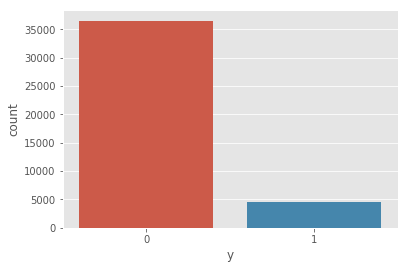

In [9]:
sns.countplot(x='y', data=df)

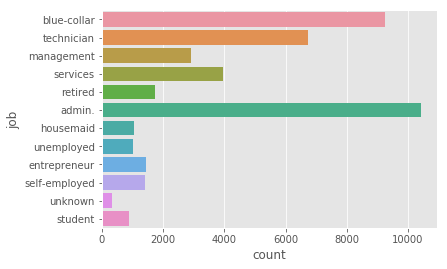

In [10]:
sns.countplot(y='job', data=df)

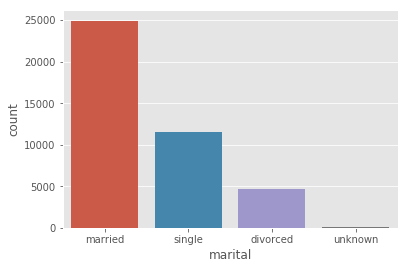

In [11]:
sns.countplot(x='marital', data=df)

In [12]:
df.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

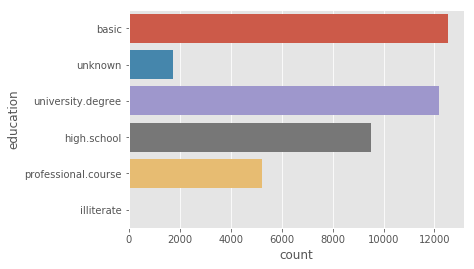

In [13]:
sns.countplot(y='education', data=df)

In [14]:
df.head()

age          job  marital          education housing loan  campaign  \
0   44  blue-collar  married              basic     yes   no         1   
1   53   technician  married            unknown      no   no         1   
2   28   management   single  university.degree     yes   no         3   
3   39     services  married        high.school      no   no         2   
4   55      retired  married              basic     yes   no         1   

   previous     poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  \
0         0  nonexistent           1.4          93.444          -36.1   
1         0  nonexistent          -0.1          93.200          -42.0   
2         2      success          -1.7          94.055          -39.8   
3         0  nonexistent          -1.8          93.075          -47.1   
4         1      success          -2.9          92.201          -31.4   

   euribor3m  nr_employed  y  
0      4.963       5228.1  0  
1      4.021       5195.8  0  
2      0.729       4991.6  1  
3      1.405       5099.1  0  
4      0.869       5076.2  1

### Pre Processing


In [15]:
le = preprocessing.LabelEncoder()

In [16]:
df.job = le.fit_transform(df.job)

In [17]:
df.marital = le.fit_transform(df.marital)

In [18]:
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)

In [19]:
df.head()

age  job  marital  education  housing  loan  campaign  previous  poutcome  \
0   44    1        1          0        2     0         1         0         1   
1   53    9        1          5        0     0         1         0         1   
2   28    4        2          4        2     0         3         2         2   
3   39    7        1          1        0     0         2         0         1   
4   55    5        1          0        2     0         1         1         2   

   emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0           1.4          93.444          -36.1      4.963       5228.1  0  
1          -0.1          93.200          -42.0      4.021       5195.8  0  
2          -1.7          94.055          -39.8      0.729       4991.6  1  
3          -1.8          93.075          -47.1      1.405       5099.1  0  
4          -2.9          92.201          -31.4      0.869       5076.2  1

In [20]:
df.shape

(41188, 15)

In [21]:
X = df.iloc[:,0:14]
X[0:10]

age  job  marital  education  housing  loan  campaign  previous  poutcome  \
0   44    1        1          0        2     0         1         0         1   
1   53    9        1          5        0     0         1         0         1   
2   28    4        2          4        2     0         3         2         2   
3   39    7        1          1        0     0         2         0         1   
4   55    5        1          0        2     0         1         1         2   
5   30    4        0          0        2     0         8         0         1   
6   37    1        1          0        2     0         1         0         1   
7   39    1        0          0        2     0         1         0         1   
8   36    0        1          4        0     0         1         1         2   
9   27    1        2          0        2     0         2         1         0   

   emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  
0           1.4          93.444          -36.1      4.963       5228.1  
1          -0.1          93.200          -42.0      4.021       5195.8  
2          -1.7          94.055          -39.8      0.729       4991.6  
3          -1.8          93.075          -47.1      1.405       5099.1  
4          -2.9          92.201          -31.4      0.869       5076.2  
5           1.4          93.918          -42.7      4.961       5228.1  
6          -1.8          92.893          -46.2      1.327       5099.1  
7          -1.8          92.893          -46.2      1.313       5099.1  
8          -2.9          92.963          -40.8      1.266       5076.2  
9          -1.8          93.075          -47.1      1.410       5099.1

In [22]:
y = df.iloc[:,14]
y[0:10]

0    0
1    0
2    1
3    0
4    1
5    0
6    0
7    0
8    1
9    0
Name: y, dtype: int64

### Train and Test split


In [23]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) 

In [24]:
x_train.shape, y_train.shape

((32950, 14), (32950,))

In [25]:
x_test.shape, y_test.shape

((8238, 14), (8238,))

### Training the model
We will make use of different classification algorithms to train this data set and will record the accuracy on test set.

#### Logistic Regression

In [26]:
model=LogisticRegression(penalty='l2', max_iter=1000)

In [27]:
model.fit(x_train, y_train)

C:\Users\UV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
prediction=model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.902282107307599

In [30]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[7270   55]
 [ 750  163]]
